# E-commerce Customer Segmentation

Hi! Mario here! In this project I'll a dataset obtained from Kaggle (https://www.kaggle.com/datasets/carrie1/ecommerce-data) to segment customers. This is a transnational dataset which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers. 

Let's first import some packages and load the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('ecommerce.csv', encoding='unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Looking at the min values, we see that there are some negative ones, let's drop those.

In [5]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


Let's see if there are some null values, and drop the duplicates.

In [6]:
original_shape = df.shape[0]
df = df.drop_duplicates().reset_index()
del df['index']
new_shape = df.shape[0]
print(F'There were {original_shape - new_shape} duplicates dropped')

There were 5226 duplicates dropped


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132186
Country             0
dtype: int64

We can see that there 5,226 duplicates! And that there are a lot of null values in the Customer ID. We'll drop them, as without customer ID it's impossible to group each customer purchases, so they must be purchases with an error at identifing the customer, or without logging in. 

The idea is to use the Customer ID, Quantity, , Invoice Number, Invoice Date and Unit Price to perform an RFM segmentation, with the purpose of understanding the customer's behavior. RFM stands for:

Recency: Last time a customer made a purchase.

Frequency: How often a customer makes a purchase.

Monetary: The amount that a customer spends in their purchases.

I won't use Stock Codes, Descriptions or Countries, as they would require too many label encodings in order to work with models such as K-Means. Let's see how many customers are per country, to gain a better understanding, before and after dropping the null values.

In [8]:
print('Number of StockCodes = ', df['StockCode'].unique().size)
print('Number of Descriptions = ', df['Description'].unique().size)
print('Number of Countries = ', df['Country'].unique().size) 
print('')
print(df[['Country', 'CustomerID']].groupby('Country').size().sort_values(ascending = False))

Number of StockCodes =  3922
Number of Descriptions =  4026
Number of Countries =  38

Country
United Kingdom          479985
Germany                   9025
France                    8392
EIRE                      7879
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1958
Portugal                  1492
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Unspecified                442
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     292
Hong Kong                  280
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United

In [9]:
df = df.dropna()
df.shape

(392692, 8)

In [10]:
print(df[['Country', 'CustomerID']].groupby('Country').size().sort_values(ascending = False))
print('')
print('Number of Countries = ', df['Country'].unique().size)      

Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


We can see that, of course, the UK has the highest number of customers (349,203), by a large margin, probably because the store is from there. Also, the next ones are countries which are closer to the UK. By removing the null values, most of them were from the UK, and 1 country was deleted from the dataframe, Hong-Kong, which had 280 customers.  

Let's begin with the creation of the RFM DataFrame. For each dimension, I'll use lambda functions.

First I'll calculate the Recency, which will be the number of days between the last purchase day and the first global one in the dataset, for each customer. First, we convert the date to the datetime format and get the most recent date for each customer. Then we subtract the minimum date.

Then I'll calculate the frequency, which means the amount of times a customer has made a purchase.

Finally, it's the turn for the monetary value, which will be the total amount spent by each customer. 

Each of the steps mentioned above happen in the cell below. The RFM DataFrame is created using lambda functions for each one of the 3 dimensions.

In [11]:
# Convert the Invoice date to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Get the minimum date in the Dataframe for Recency reference
min_date = df['InvoiceDate'].min() 

#Calculate the amount spent in each purchase
df['total'] = df['Quantity'] * df['UnitPrice']

#Create the DataFrame
RFM = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (x.max() - min_date).days, 'InvoiceNo': lambda x: len(x), 
                                    'total': lambda x: x.sum()})

RFM.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'total': 'Monetary'}, inplace=True)

RFM.reset_index(inplace = True)

RFM = RFM.drop('CustomerID', axis = 1)

RFM

,Recency,Frequency,Monetary
0,48,1,77183.60
1,371,182,4310.00
2,298,31,1797.24
3,355,73,1757.55
4,63,17,334.40
...,...,...,...
4333,96,10,180.60
4334,193,7,80.82
4335,366,12,178.05
4336,370,721,2045.53


In [12]:
RFM.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,280.929230,90.523744,2048.688081
std,100.012701,225.506968,8985.230220
min,0.000000,1.000000,3.750000
25%,231.250000,17.000000,306.482500
50%,323.000000,41.000000,668.570000
75%,356.000000,98.000000,1660.597500
max,373.000000,7676.000000,280206.020000


Now we have our RFM Dataframe!!! The next step is to decide which model to use. Normally, for this kind of analysis K-Means is the most popular method, but it is sensitive to outliers, so let's analyze that. Let's plot the respective histograms and boxplots. First a helping function for the distributions.

In [13]:
def plot_hist(df):
    
    plt.figure(figsize=(15, 5))
    
    for i in range(0, len(df.columns)):
        plt.subplot(1, len(df.columns), i + 1 )
        sns.histplot(df.iloc[:, i])
        plt.title(df.columns[i])
    
    plt.tight_layout()
    plt.show()

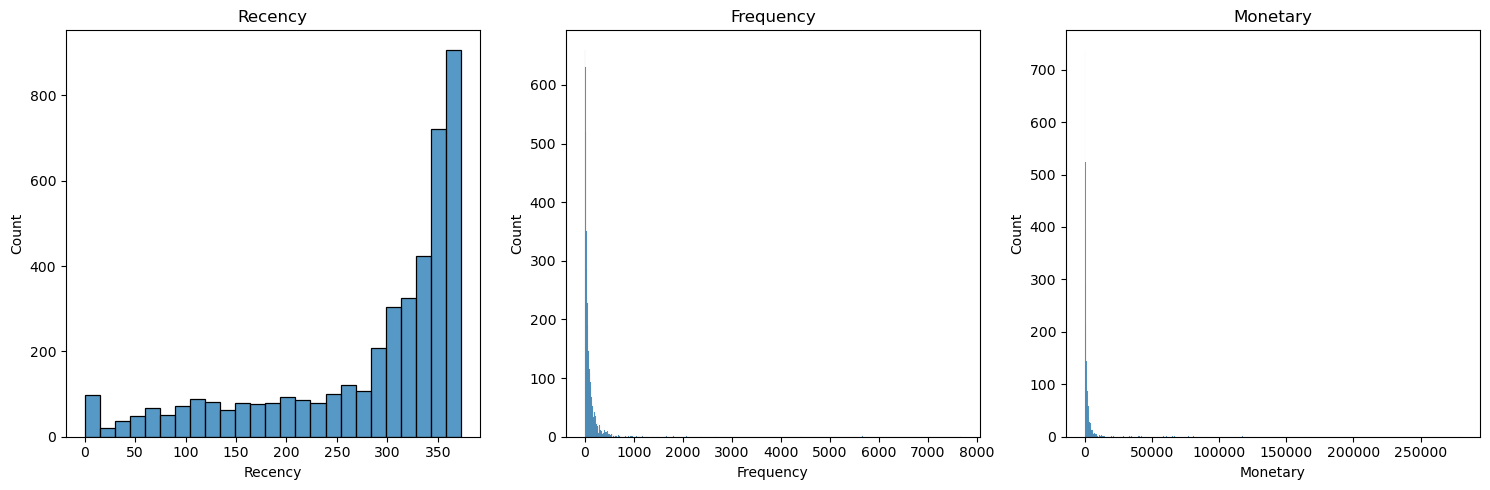

In [14]:
plot_hist(RFM)

As we can see, the distributions are really skewed, to the left in the case of the Recency and to the right in the other 2 cases. Due to the scales of the last to histograms, we know there are some outliers. This is confirmed by looking and the boxplots below, where Frequency and Monetary have a lot of outliers. 

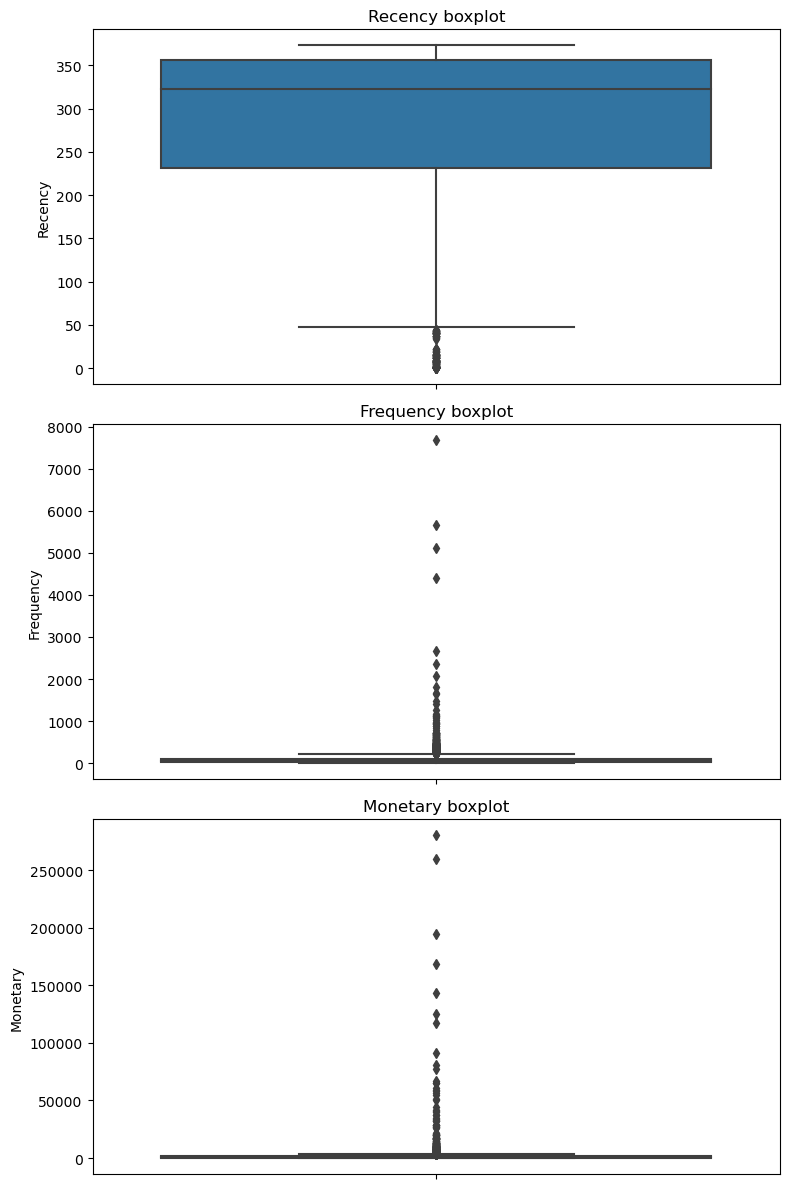

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

sns.boxplot(y = RFM['Recency'], ax=axes[0])
axes[0].set_title('Recency boxplot')

sns.boxplot(y = RFM['Frequency'], ax=axes[1])
axes[1].set_title('Frequency boxplot')

sns.boxplot(y = RFM['Monetary'], ax=axes[2])
axes[2].set_title('Monetary boxplot')

plt.tight_layout()

plt.show()

The 3 dimensions have outliers, the last 2 more than the Recency. Let's remove these outliers using the Z-Score, where each data point with a Z-Score equal or greater than 3 will be removed.

In [16]:
from scipy import stats

#Get the current number of customers
orig_number = RFM.shape[0]

z_scores = stats.zscore(RFM)

#Take absolute values for Z-Scores, as it has 2 tails
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)

RFM = RFM[filtered_entries]

outliers = orig_number - RFM.shape[0]

print(F'{outliers} outliers dropped ({outliers/orig_number*100}%)')

RFM

50 outliers dropped (1.1526048870447212%)


,Recency,Frequency,Monetary
1,371,182,4310.00
2,298,31,1797.24
3,355,73,1757.55
4,63,17,334.40
5,337,85,2506.04
...,...,...,...
4333,96,10,180.60
4334,193,7,80.82
4335,366,12,178.05
4336,370,721,2045.53


We removed 50 outliers. Let's see how the distributions are now.

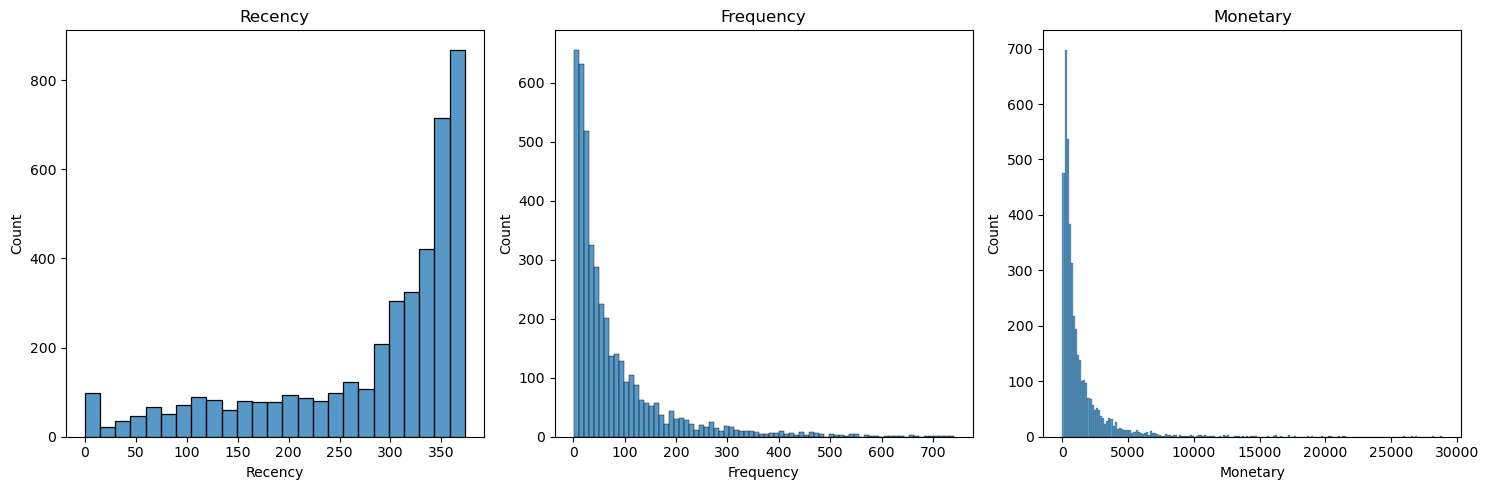

In [17]:
plot_hist(RFM)

We can see that they are closer to what we need, but for the use of K-Means, we must have something like a normal distribution. I'll use a Box Cox transformation in order to achieve that. It needs strictly positive data, so let's make sure of that.

In [18]:
from sklearn.preprocessing import PowerTransformer

#Positive data
RFM = RFM[(RFM['Recency'] > 0) & (RFM['Frequency'] > 0) & (RFM['Monetary'] > 0)]

RFM = RFM.drop_duplicates()

pt = PowerTransformer(method = 'box-cox')

box_cox = pt.fit_transform(RFM)


box_cox = pd.DataFrame(box_cox, columns = ['Recency', 'Frequency', 'Monetary'])

box_cox

,Recency,Frequency,Monetary
0,1.073109,1.261789,1.498822
1,0.025532,-0.226069,0.798665
2,0.826997,0.462646,0.780536
3,-1.956577,-0.676766,-0.602976
4,0.561133,0.591006,1.067061
...,...,...,...
4266,-1.816242,-1.053980,-1.135347
4267,-1.133454,-1.297045,-1.845939
4268,0.995213,-0.926512,-1.147758
4269,1.057458,2.605099,0.903471


Below I plot the distributions obtained with the Box Cox transformation. We can see that the Frequency and Monetary look like a normal distribution. Let's see the mean and standard deviation using the describe command.

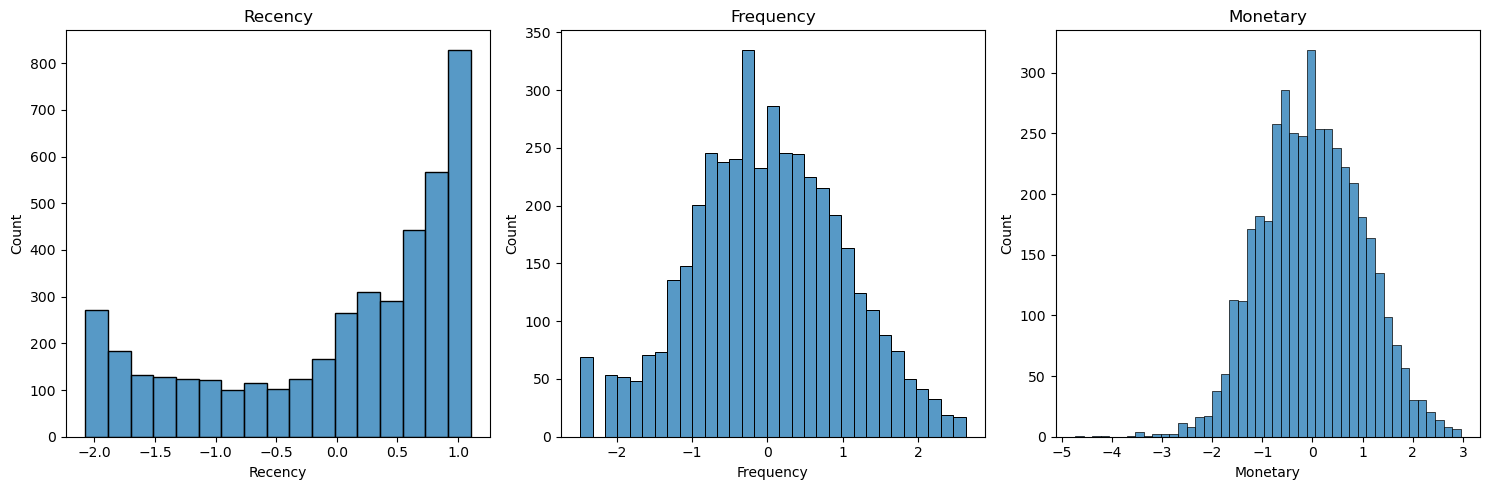

In [19]:
plot_hist(box_cox)

In [20]:
box_cox.describe()

,Recency,Frequency,Monetary
count,4.271000e+03,4.271000e+03,4271.000000
mean,-1.530553e-16,2.424762e-16,0.000000
std,1.000117e+00,1.000117e+00,1.000117
min,-2.075839e+00,-2.487254e+00,-4.731583
25%,-7.521502e-01,-6.767660e-01,-0.680215
50%,3.485496e-01,-2.693254e-02,-0.028004
75%,8.269972e-01,7.039018e-01,0.707149
max,1.104517e+00,2.632212e+00,2.956443


We can see that our features have mean = 0 and std = 1, so they are standardized. Now we can perform K-Means. One disadvantage of this algorithm is that we need to manually specify the number of clusters, and this can be done using the Elbow Method, complementing it with the Silhouette Score.

Text(0, 0.5, 'Silhouette Score')

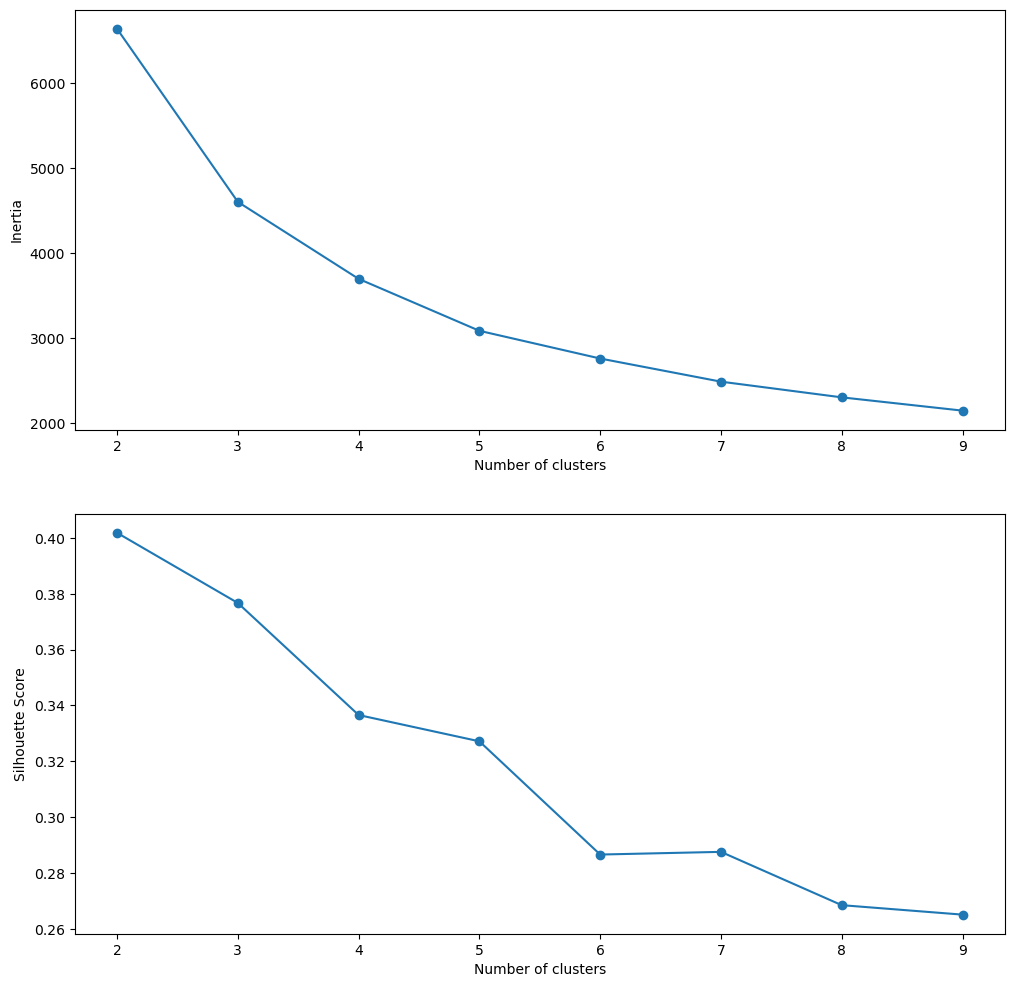

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

SSE = []
silhouette = []

for cluster in range(2,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(box_cox)
    SSE.append(kmeans.inertia_)
    silhouette.append(silhouette_score(box_cox, kmeans.labels_, metric='euclidean'))
    
# Converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster': range(2,10), 'SSE': SSE, 'Silhouette': silhouette})

plt.figure(figsize=(12,12))

plt.subplot(2, 1, 1)
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(2, 1, 2)
plt.plot(frame['Cluster'], frame['Silhouette'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

Looking at both plots above, we can see that the optimal number of clusters is between 3 and 4, with a Silhouette Score of about 0.38 in the case of 3 clusters and about 0.34 in the second case. These could be considered acceptable scores, although it means there is some superposition between some data points. Let's stick with the case of 4 clusters.

In [22]:
kmeans = KMeans(n_clusters = 4, init='k-means++', random_state = 0)
kmeans.fit(box_cox)

KMeans(n_clusters=4, random_state=0)

In [23]:
prediction = kmeans.predict(box_cox)

# We create a column for our original RFM DataFrame for the cluster label
RFM['Cluster'] = prediction

RFM

,Recency,Frequency,Monetary,Cluster
1,371,182,4310.00,0
2,298,31,1797.24,3
3,355,73,1757.55,3
4,63,17,334.40,1
5,337,85,2506.04,0
...,...,...,...,...
4333,96,10,180.60,1
4334,193,7,80.82,1
4335,366,12,178.05,2
4336,370,721,2045.53,0


Let's get the cluster centers and use an inverse transformation to go from the Box Cox values to the real ones. Also, we can view this in a better way using bar plots, for Recency, Frequency and Monetary.

In [24]:
centers = pd.DataFrame(data = pt.inverse_transform(kmeans.cluster_centers_), columns = ['Recency', 'Frequency', 'Monetary'])

centers

,Recency,Frequency,Monetary
0,350.017386,189.881417,3310.296423
1,143.165414,15.134853,274.270660
2,324.977621,12.304411,231.452281
3,323.675158,54.000595,904.025746


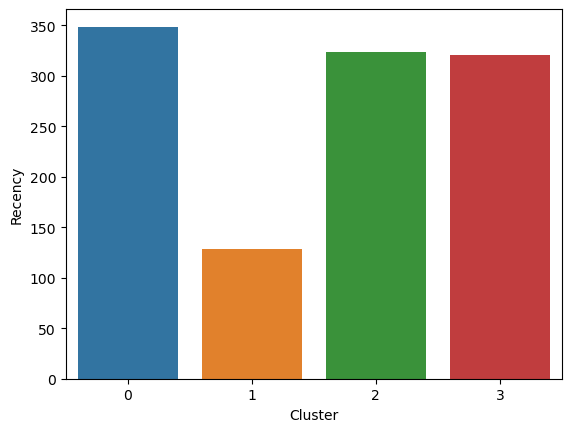

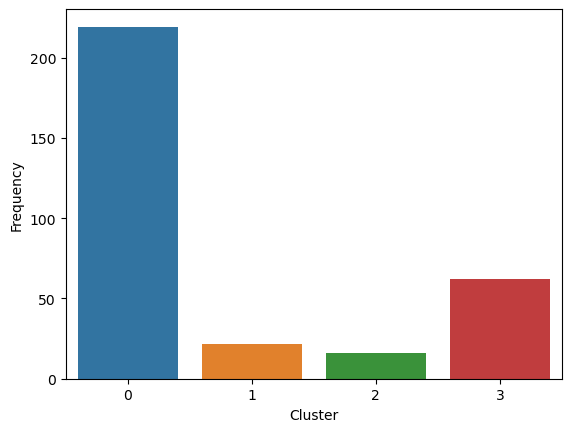

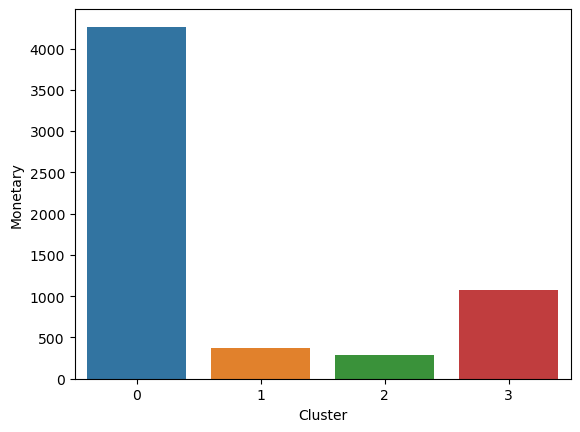

In [25]:
avg_df = RFM.groupby(['Cluster'], as_index=False).mean()
for dimension in RFM.columns[0:3]:
    sns.barplot(x = avg_df['Cluster'], y = avg_df[dimension])
    plt.show()

From the cluster centers Data Frame and the bar plots, we have 4 clusters, which are the following:

Cluster 0: Customers with a really high Recency, Frequency and Monetary. That is, the ideal customers!.

Cluster 1: Customers with a medium Recency and low Frequency and Monetary. Maybe we should motivate them to return and buy more.

Cluster 2: Customers with a high Recency and low Frequency and Monetary. The mean Frequency is about something like 15 and the mean Monetary something like $250, so they must correspond to customers who started purchasing recently, and spending lower amounts. We need to keep them engaged.

Cluster 3: Customers with a high Recency and low Frequency and Monetary, but greater than the case of Cluster 2. The mean Frequency is about something like 60 and the mean Monetary something like $1,000. So they have been purchasing more than Cluster 2. We also need to keep them engaged.
